In [5]:
import pandas as pd
import numpy as np
import openpyxl

In [7]:
df = pd.read_csv('Data_Lecture_5-5.csv')
df.head()

,repond id,response,male,activity,age
0,1,1,0,0,58
1,2,1,1,0,50
2,3,1,1,0,40
3,4,1,1,0,36
4,5,1,1,0,28


##  Questions

### (a) 
* Show that

In [8]:
beta_0 = -2.488
beta_1 = 0.954   # male
beta_2 = 0.914   # active
beta_3 = 0.070   # age
beta_4 = -0.069  # (age/10)^2

In [10]:
age = df['age']
male = df['male']
active = df['activity']

In [11]:
eta = (
    beta_0 +
    beta_1 * male +
    beta_2 * active +
    beta_3 * age +
    beta_4 * (age / 10) ** 2
)

In [12]:
pi = np.exp(eta) / (1 + np.exp(eta))

In [13]:
d_eta_d_age = beta_3 + 2 * beta_4 * age / 100

In [14]:
d_pi_d_age = pi * (1 - pi) * d_eta_d_age

In [15]:
d_one_minus_pi_d_age = -d_pi_d_age

In [16]:
sum_derivatives = d_pi_d_age + d_one_minus_pi_d_age

In [17]:
tolerance = 1e-10
all_zero = np.all(np.abs(sum_derivatives) < tolerance)

In [18]:
print("Todas as somas das derivadas são aproximadamente zero?", all_zero)
print("Exemplo das primeiras 5 somas de derivadas:", sum_derivatives.head())

Todas as somas das derivadas são aproximadamente zero? True
Exemplo das primeiras 5 somas de derivadas: 0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64


### (b) 
* Assume that you recode the dependent variable as follows: resp new i = respi+1. Hence, positive response is
 now defined to be equal to zero and negative response to be equal to 1. Use the odds ratio to show that this
 transformation implies that the sign of all parameters change.

In [19]:
import statsmodels.api as sm

In [21]:
df['age2'] = (df['age'] / 10) ** 2
X = df[['male', 'activity', 'age', 'age2']]
X = sm.add_constant(X)

In [23]:
y_original = df['response']
model_original = sm.Logit(y_original, X).fit(disp=0)

In [24]:
y_reversed = 1 - df['response']
model_reversed = sm.Logit(y_reversed, X).fit(disp=0)

In [25]:
# Mostrar os coeficientes
print("Coeficientes do modelo original:")
print(model_original.params)
print("\nCoeficientes do modelo com variável resposta invertida:")
print(model_reversed.params)

# Verificação da mudança de sinal
print("\nVerificação: coeficientes são simétricos (mudança de sinal)?")
print(np.allclose(model_original.params.values, -model_reversed.params.values))

Coeficientes do modelo original:
const      -2.488358
male        0.953694
activity    0.913748
age         0.069945
age2       -0.068692
dtype: float64

Coeficientes do modelo com variável resposta invertida:
const       2.488358
male       -0.953694
activity   -0.913748
age        -0.069945
age2        0.068692
dtype: float64

Verificação: coeficientes são simétricos (mudança de sinal)?
True


### (c) 
* Consider again the odds ratio positive response versus negative response:

  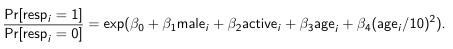
.* 
 During lecture 5.5 you have seen that this odds ratio obtains its maximum value for age equal to 50 years for
 males as well as females. Suppose now that you want to extend the logit model and allow that this age value
 is possibly different for males than for females. Discuss how you can extend the logit specification

In [26]:
df['age2'] = (df['age'] / 10) ** 2
df['male_age'] = df['male'] * df['age']
df['male_age2'] = df['male'] * df['age2']

In [27]:
X_ext = df[['male', 'activity', 'age', 'age2', 'male_age', 'male_age2']]
X_ext = sm.add_constant(X_ext)

y = df['response']

In [28]:
model_ext = sm.Logit(y, X_ext).fit(disp=0)

print(model_ext.summary())

                           Logit Regression Results                           
Dep. Variable:               response   No. Observations:                  925
Model:                          Logit   Df Residuals:                      918
Method:                           MLE   Df Model:                            6
Date:                Sat, 31 May 2025   Pseudo R-squ.:                 0.06396
Time:                        19:11:52   Log-Likelihood:                -600.04
converged:                       True   LL-Null:                       -641.04
Covariance Type:            nonrobust   LLR p-value:                 1.381e-15
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4766      1.458     -0.327      0.744      -3.335       2.382
male          -2.1422      1.828     -1.172      0.241      -5.725       1.441
activity       0.9394      0.186      5.041      0.0

In [29]:
# Extrai os coeficientes
b3 = model_ext.params['age']
b4 = model_ext.params['age2']
b5 = model_ext.params['male_age']
b6 = model_ext.params['male_age2']

# Idade que maximiza a odds ratio
age_max_female = -100 * b3 / (2 * b4)
age_max_male = -100 * (b3 + b5) / (2 * (b4 + b6))

print(f"Idade que maximiza a odds ratio (feminino): {age_max_female:.2f} anos")
print(f"Idade que maximiza a odds ratio (masculino): {age_max_male:.2f} anos")

Idade que maximiza a odds ratio (feminino): 50.41 anos
Idade que maximiza a odds ratio (masculino): 50.51 anos
